In [331]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [332]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, max_iter=10000, fit_intercept=True, verbose=False, saturation=0.1):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        self.coef_ = None

        self.cost_ = None
        self.coefs_ = None
        self.X = None
        self.y = None
        self.saturation = saturation

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        if self.fit_intercept:
            X = np.c_[np.ones((X.shape[0], 1)), X]
        self.coef_ = np.zeros(X.shape[1])
        
      
        self.cost_ = []
        self.coefs_ = []
       
        self.coefs_.append(self.coef_)
      
        for i in range(self.max_iter):
            z = np.dot(X, self.coef_)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.coef_ -= self.learning_rate * gradient
            cost = self.fcost_(y, h)
            self.cost_.append(cost)
            self.coefs_.append(list(self.coef_))
            if self.verbose:
                if i % 100 == 0:
                    print('Iteration: ' + str(i) + ' Cost: ' + str(cost))
                
        self.coefs_ = np.array(self.coefs_)
        return self

    def predict_proba(self, X):
        if self.fit_intercept:
            X = np.c_[np.ones((X.shape[0], 1)), X]
        return self.sigmoid(np.dot(X, self.coef_))
    
    def predict_proba(self, X, coeff):
        if self.fit_intercept:
            X = np.c_[np.ones((X.shape[0], 1)), X]
        return self.sigmoid(np.dot(X, coeff))

    def predict(self, X):
        return self.predict_proba(X).round()
    
    def fcost_(self, y, h):
        return -np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) / y.size
    
    def totalCost(self, coeff):
        return self.fcost_(self.y, self.predict_proba(self.X, coeff))

    def score(self, X, y):
        return np.mean(self.predict(X) == y)
    
    def plot_cost(self):
        plt.plot(range(self.max_iter), self.cost_)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.show()

    def plot_coeff_cost_contour(self):
        # print error message if features is not 2-dimensional
        if self.X.shape[1] != 1:
            print('Error: Features must be 2-dimensional including w0 but is ' + str(self.X.shape[1]) + '-dimensional.')
            return
        
        coeff0min = np.min(self.coefs_[:, 0])-1
        coeff0max = np.max(self.coefs_[:, 0])+1
        coeff1min = np.min(self.coefs_[:, 1]) - 1
        coeff1max = np.max(self.coefs_[:, 1])+1

        coeff0 = np.linspace(coeff0min, coeff0max, 100)
        coeff1 = np.linspace(coeff1min, coeff1max, 100)
        coeff0, coeff1 = np.meshgrid(coeff0, coeff1)
        cost = np.zeros(coeff0.shape)
        for i in range(coeff0.shape[0]):
            for j in range(coeff0.shape[1]):
                cost[i, j] = self.totalCost(np.array([coeff0[i, j], coeff1[i, j]]))
        plt.contour(coeff0, coeff1, cost, levels=40)
        # plot the selected tragectory
        plt.scatter(self.coefs_[:, 0], self.coefs_[:, 1])
        plt.xlabel('w0')
        plt.ylabel('w1')
        plt.show()
    
    def plot_classifier(self):
        # print error message if features is not 2-dimensional
        # if self.X.shape[1] != 2:
        #     print('Error: Features must be 2-dimensional including w0 but is ' + str(self.X.shape[1]) + '-dimensional.')
        #     return
        
        # plot the data points
        plt.scatter(X, y, c='b', marker='o', s=50)
        # plot the decision boundary
        x1 = np.linspace(np.min(X), np.max(X), 100)
        x2 = self.sigmoid(self.coef_[0] + self.coef_[1] * x1)
        plt.plot(x1, x2, c='r', linewidth=2)
        # plot the decision boundary
        x3 = [0.1 if x < 0.5 else 0.9 for x in x2]
        plt.scatter(x1, x3, c='g', marker='x', s=50, alpha=0.5)
        plt.xlabel('y')
        plt.ylabel('x')
        plt.show()
        

        


In [333]:
# generate dataset using makeblobs
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=80, n_features=1)


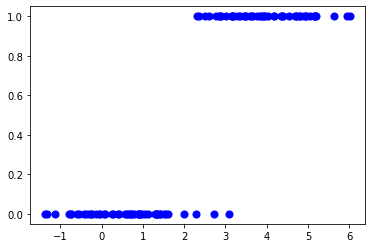

In [334]:
# plot dataset
plt.scatter(X, y, c='b', marker='o', s=50)
plt.show()

In [335]:
lrc = LogisticRegression(learning_rate=0.01, max_iter=500000, fit_intercept=True, verbose=True)
lrc.fit(X, y)



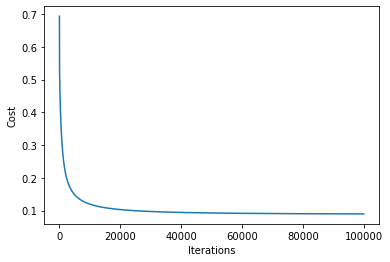

In [ ]:
lrc.plot_cost()

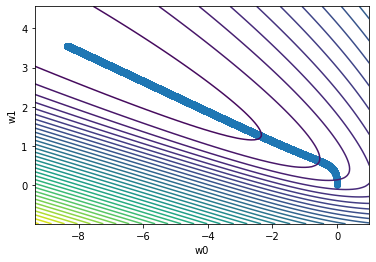

In [ ]:
lrc.plot_coeff_cost_contour()

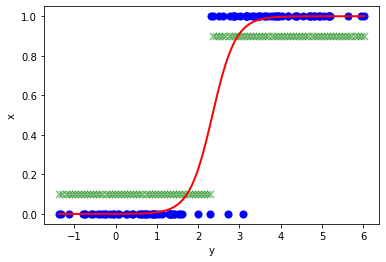

In [ ]:
lrc.plot_classifier()